In [1]:
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



C:\Users\jhroe\AppData\Local\Temp\ipykernel_13160\2671478684.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Find datafile
file = 'Rphenograph_output_275clusters_k250_16ct_fractions.csv'

# Get current directory
path = os.getcwd()
data_path = path + '/Data/'

# Set path 
output_dir = f"{data_path}/clustering/"

data = pd.read_csv(f"{data_path}/phenograph_output/{file}", index_col=0)

# rename cells to be consistent
ct_order = ['Cl Mo','Int Mo', 'Non-Cl Mo', 'DC',  'Neutrophil', 'T other', 'Tc', 'Th', 'Treg', 'Unknown']

# Harmonize cell type names and get rid of spaces
data['source_cluster'] = data['source_cluster'].replace({'T other':'T_other','Non-Cl Mo':'Non-Cl_Mo','Int Mo':'Int_Mo','Cl Mo':'Cl_Mo','Cl MAC':'Cl_Mac','Alt MAC':'Alt_Mac', 'NK cell':'NK','DCs cell':'DC','Neutrophils':'Neutrophil','B cell': 'B', 'Endothelial cell': 'Endothelial', 'Mast cell':'Mast'})
data.rename(columns={'T.other':'T_other','Non.Cl.Mo':'Non-Cl_Mo','Int.Mo':'Int_Mo','Cl.Mo':'Cl_Mo','Cl.MAC':'Cl_Mac','Alt.Mac':'Alt_Mac', 'DCs.cell':'DC', 'Mast.cell':'Mast', 'Endothelial.cell': 'Endothelial', 'B.cell': 'B', 'NK.cell': 'NK', 'Neutrophils':'Neutrophil'}, inplace=True)
data.to_csv(f"{data_path}/clustering/full_cd_275c_renamed.csv", index = False)
# df_clus.to_csv(f"{data_path}/clustering/full_cd_clus_19_39_48.csv", index = False)

df = data.iloc[:,3:]


In [3]:
data = pd.read_csv(f"{data_path}/clustering/full_cd_clus_21_40_49.csv").drop(columns={"cluster", "agglomerateto_21", "agglomerateto_49", "surv_5y"})
data_all = data
data = data[data['agglomerateto_40'].isin([26,27])].drop(columns={"agglomerateto_40"})

pi = pd.read_excel('Data/raw/LUAD Clinical Data.xlsx').rename(columns = {'Key':'Patient_ID', 'Survival or loss to follow-up (years)':'survival'})[['Patient_ID', 'survival']]

data  = pd.merge(data, pi, on='Patient_ID', how='inner')
data_all  = pd.merge(data_all, pi, on='Patient_ID', how='inner')

df = data.iloc[:,3:]

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X

,Alt.MAC,B,Cancer,Cl_Mac,Cl_Mo,DC,Endothelial,Int_Mo,Mast,NK,Neutrophil,Non-Cl_Mo,T_other,Tc,Th,Treg,Unknown
0,0.166667,0.000000,0.166667,0.166667,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.083333,0.000000,0.0,0.083333,0.000000,0.0,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333
2,0.000000,0.166667,0.000000,0.166667,0.333333,0.0,0.166667,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.166667,0.000000,0.000000,0.000000
3,0.000000,0.076923,0.000000,0.153846,0.076923,0.0,0.153846,0.000000,0.0,0.0,0.000000,0.0,0.076923,0.153846,0.153846,0.000000,0.153846
4,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.166667,0.0,0.0,0.000000,0.0,0.000000,0.333333,0.000000,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430739,0.000000,0.000000,0.000000,0.285714,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.142857,0.285714
430740,0.333333,0.166667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.166667,0.166667,0.000000,0.166667
430741,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.250000,0.125000,0.000000,0.125000
430742,0.000000,0.000000,0.000000,0.375000,0.000000,0.0,0.125000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.375000,0.000000,0.125000


In [5]:

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

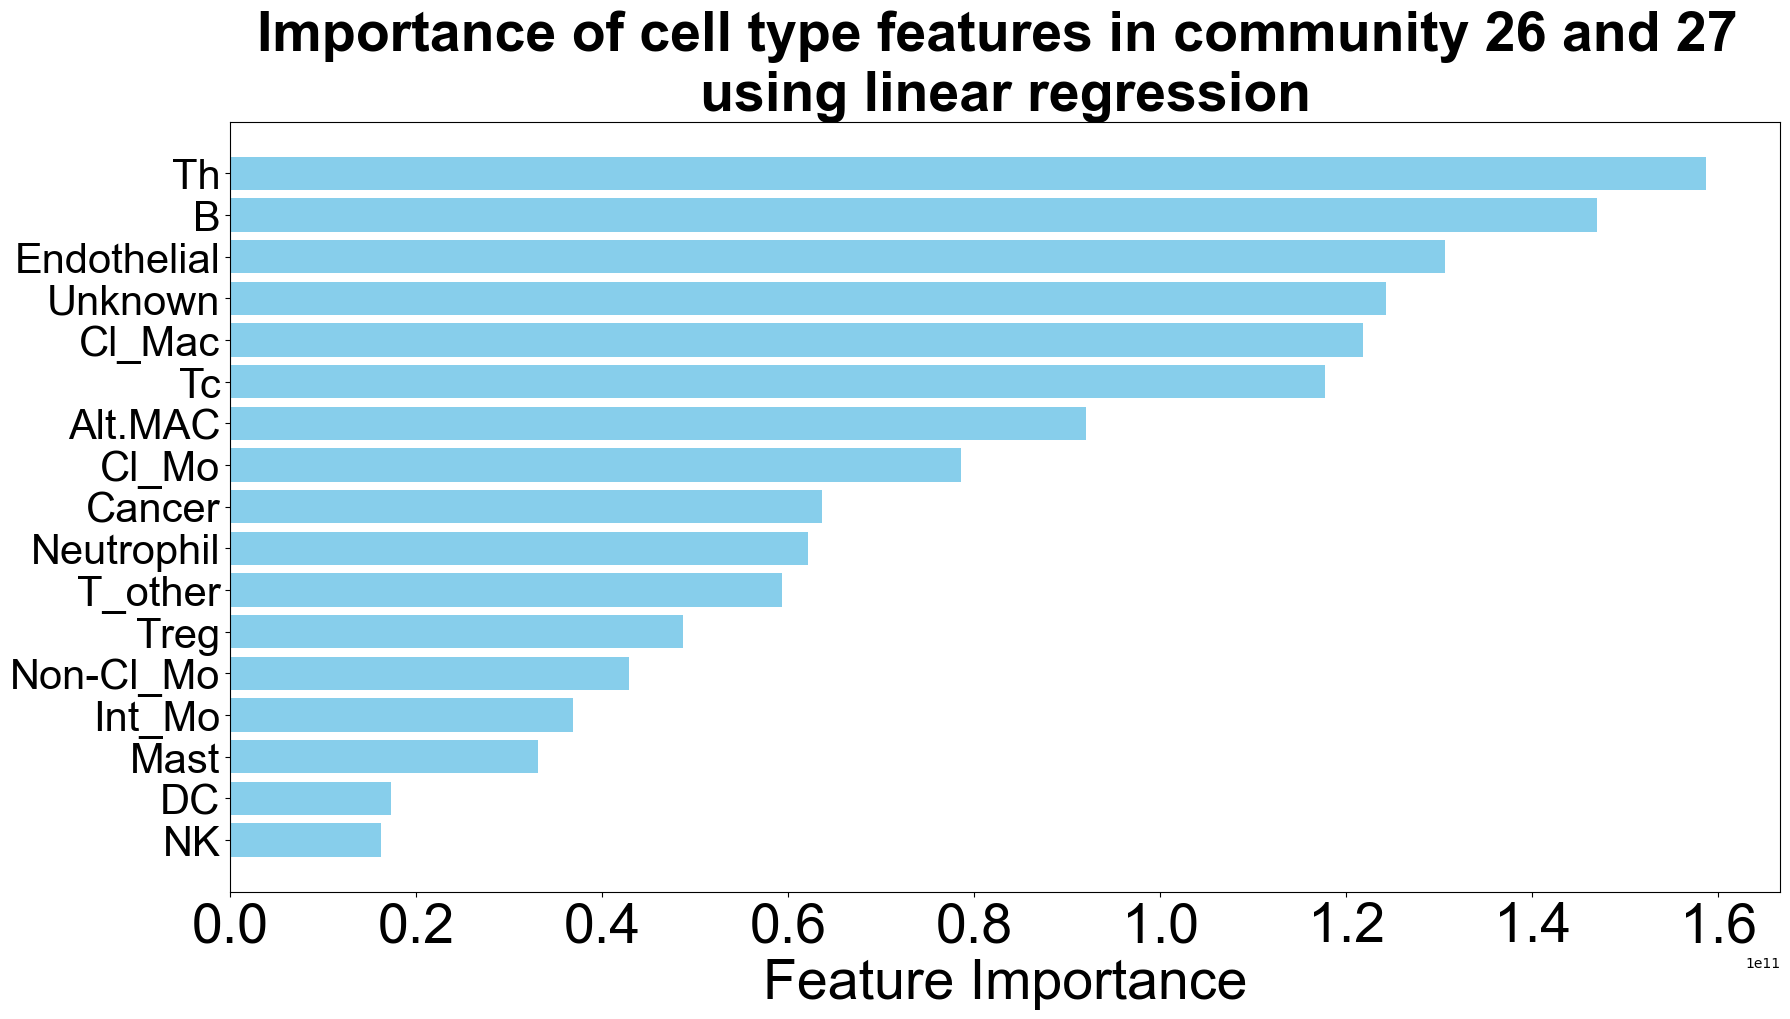

In [15]:
# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(20, 10))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance',fontsize=40, fontfamily='Arial')
plt.yticks(fontsize=30, fontfamily='Arial')
plt.xticks(fontsize=40, fontfamily='Arial')
# plt.ylabel(,fontsize=40, fontfamily='Arial')
plt.title('Importance of cell type features in community 26 and 27 \nusing linear regression',fontsize=40, fontfamily='Arial', fontweight='bold')
plt.gca().invert_yaxis()
plt.savefig(f"{data_path}/clustering_plots/featureimportance2627.jpg", bbox_inches='tight')
plt.show()


In [74]:

# df = data_all.iloc[:,3:-1]

X = data_all.iloc[:,3:-2]
y = data_all.iloc[:,-1]
X

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

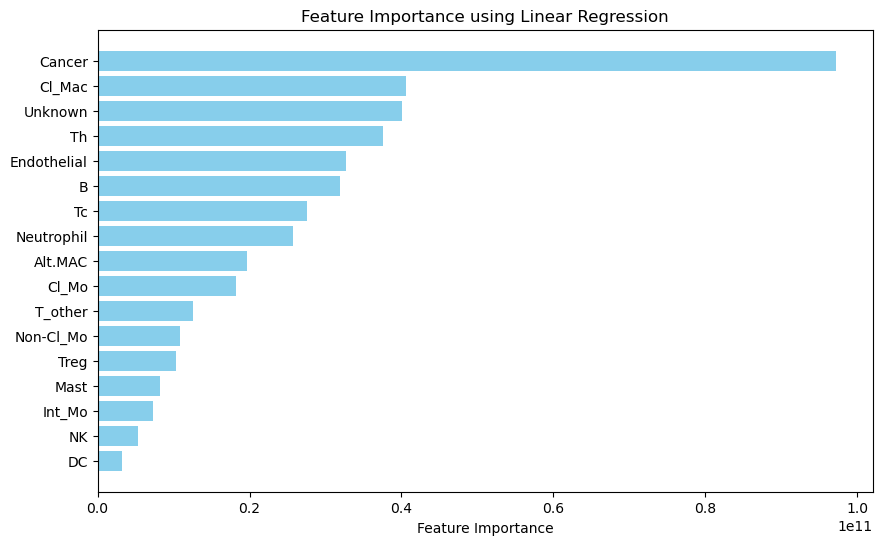

In [76]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance using Linear Regression non scaled')
plt.gca().invert_yaxis()
plt.show()
